# **A model for predicting the quality of red wine from pH, alcohol, residual sugar and sulphates.**

Group members: Czesia Lindsay, Kelly Nguyen, Persa Shameyl, Maddie Wright

### **0.1 Introduction**

Red wine is an alcoholic drink made from the fermentation of grapes, depending on the quality a bottle of red wine can be priced at over a thousand dollars. This means a massive part of the winemaking industry is focused on determining wine quality. Usually this is done by someone called a sommelier, who uses various sensory qualities of the wine to judge its quality. There is always a subjective aspect to wine quality as different people, even professionals who aim for objectivity will be influenced by different factors (Basalekou et al., 2023). To see how subjective wine quality really is an algorithm was created with the aim of identifying what relationships (if any) existed between quantifiable properties of wine and its quality. 
The dataset used to create this algorithm includes the quality and variables of many different wine samples. For conducting the data analysis, we will use a classification model through the K-nearest neighbours (KNN) algorithm to predict the quality of red wine based on our chosen variables of pH, alcohol, residual sugar and sulphates.  Since acidity, alcohol content, residual sugars and sulphates are some of the main factors sommeliers consider when determining quality (Basalekou et al., 2023) they were chosen as the variables to be examined. 


### **1.0 Preliminary Exploratory Data Analysis**
Before reading in the data, certain library packages must be loaded in to allow for extensions and add-ons to create the machine learning algorithm process, as well as the visualisations needed for both exploratory data analysis and predictive modelling. GGally and ggplot2 are library extensions for complex graphing which allows for the creation of comparing multiple variables on scatter plots, area graphs and box plots that will be used for the analysis. 

In [1]:
#code packages
library(tidyverse)
library(cowplot)
library(scales)
library(GGally)
library(ggplot2)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“package ‘GGally’ was built under R version 4.3.2

### 1.1 Cleaning and Wrangling Data
We started off by assigning the raw github data link from our public repository to an object named url, then downloading url as a file named 'data/winequality-red/csv'. After, we read the data then reassigned it as a dataframe object named red_wine, which is then tidied and wrangled. The columns for each predictive variable had spaces which needed to be replaced with underscores such that 'fixed acidity' became 'fixed_acidity'. Additionally the needed variables for the research project; residual sugar, pH, sulphates, alcohol and quality were selected so that the tidy data contained only the variables we wanted to examine.

To ensure reproducibility, the data has been set to seeds of 2222 or 3005 (random numbers); for code and graphing respectively. Here we set the seed as 2222, then the red_wine dataset was split into 75% training and 25% testing datasets.

In [2]:
url <- "https://raw.githubusercontent.com/swallowmesea/37/main/data/winequality-red.csv"
download.file(url, 'data/winequality-red.csv')
red_wine <- read_delim('data/winequality-red.csv', delim = ';')
red_wine <- red_wine |>
mutate(quality = as_factor(quality)) 
colnames(red_wine) <- c("fixed_acidity","volatile_acidity","citric_acid","residual_sugar", "chlorides",
"free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality")
red_wine <- red_wine |>
select(residual_sugar, pH:quality)
print('Table 1: Head of Cleaned and Wrangled Data')
head(red_wine)

#general training data
set.seed(2222)
wine_split <- initial_split(red_wine, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)
print('Table 2: Head of Wine Training Dataset')
head(wine_train)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1: Head of Cleaned and Wrangled Data"


residual_sugar,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.9,3.51,0.56,9.4,5
2.6,3.20,0.68,9.8,5
2.3,3.26,0.65,9.8,5
1.9,3.16,0.58,9.8,6
1.9,3.51,0.56,9.4,5
1.8,3.51,0.56,9.4,5


[1] "Table 2: Head of Wine Training Dataset"


residual_sugar,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.9,3.51,0.56,9.4,5
2.6,3.20,0.68,9.8,5
2.3,3.26,0.65,9.8,5
1.8,3.51,0.56,9.4,5
6.1,3.35,0.80,10.5,5
1.8,3.28,0.54,9.2,5


### 1.2 Summary
Since the head of wine_train is cleaned and wrangled, with the right categorical variables, we can further progress with the preliminary exploratory data analysis by creating summaries of our factor and the 4 chosen variables for the research project with the wine train dataset. 

For the factor variable (quality), it was summarized to take the percent of each quality number to calculate it's frequency in the dataset. The quality numbers 3-8 are only apparent in the wine train data, with percentages ranging from 0.75%-42.4%. The summary provides insight on how 5 (42.4%) and 6 (39.9%) dominates in the frequency. 

Then for the dbl variables (pH, residual sugar, alcohol and sulphates), they have been summarized to take mean, median, minimum and maximum of each variable where the factor variable can be analyzed. Due to the nature of our data, the dominating quality number is difficult to rule out, so to simplify we will analyze the means of each variable. The highest for mean sugar was 8, for mean pH it was 3, for mean alcohol it was 8 and lastly for mean sulphates it was 8. After analyzing each tibble, 8 seems to be most prominent as a quality factor variable.

In [3]:
set.seed(2222)
quality_obs <- wine_train |>
group_by(quality) |>
summarize(n = n()) |>
mutate(percentage = 100*n/nrow(wine_train))
print('Table 3: Total Number and Percentage of Observations per Quality class')
quality_obs

[1] "Table 3: Total Number and Percentage of Observations per Quality class"


quality,n,percentage
<fct>,<int>,<dbl>
3,9,0.7518797
4,39,3.2581454
5,508,42.4394319
6,478,39.9331662
7,150,12.5313283
8,13,1.0860485


In [4]:
set.seed(2222)
sugar_summary <- wine_train |>
group_by(quality) |>
summarize(mean_sugar = mean(residual_sugar), median_sugar = median(residual_sugar), 
          min_sugar = min(residual_sugar), max_sugar = max(residual_sugar))
print('Table 4: Summary of Residual Sugar respective to each Quality class')
sugar_summary

[1] "Table 4: Summary of Residual Sugar respective to each Quality class"


quality,mean_sugar,median_sugar,min_sugar,max_sugar
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,2.683333,2.1,1.2,5.7
4,2.441026,2.1,1.4,5.6
5,2.541831,2.2,1.2,13.8
6,2.499059,2.2,0.9,15.4
7,2.732000,2.3,1.2,8.9
8,2.869231,2.5,1.4,6.4


In [5]:
set.seed(2222)
pH_summary <- wine_train |>
group_by(quality) |>
summarize(mean_pH = mean(pH), median_pH = median(pH), 
          min_pH = min(pH), max_pH = max(pH))
print('Table 5: Summary of pH respective to each Quality class')
pH_summary

[1] "Table 5: Summary of pH respective to each Quality class"


quality,mean_pH,median_pH,min_pH,max_pH
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,3.414444,3.400,3.16,3.63
4,3.370256,3.370,2.74,3.75
5,3.302461,3.300,2.89,3.74
6,3.320439,3.320,2.86,4.01
7,3.298133,3.295,2.92,3.78
8,3.213077,3.210,2.88,3.56


In [6]:
set.seed(2222)
alc_summary <- wine_train |>
group_by(quality) |>
summarize(mean_alcohol = mean(alcohol), median_alcohol = median(alcohol), 
          min_alcohol = min(alcohol), max_alcohol = max(alcohol))
print('Table 6: Summary of Alcohol respective to each Quality class')
alc_summary 

[1] "Table 6: Summary of Alcohol respective to each Quality class"


quality,mean_alcohol,median_alcohol,min_alcohol,max_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,10.061111,9.95,8.4,11.0
4,10.233333,10.00,9.0,11.8
5,9.893504,9.70,8.5,13.0
6,10.638006,10.50,8.4,14.0
7,11.484000,11.55,9.5,14.0
8,12.046154,12.50,9.8,13.4


In [7]:
set.seed(2222)
sulphates_summary <- wine_train |>
group_by(quality) |>
summarize(mean_sulphates = mean(sulphates), median_sulphates = median(sulphates), 
          min_sulphates = min(sulphates), max_sulphates = max(sulphates))
print('Table 7: Summary of Sulphates respective to each Quality class')
sulphates_summary

[1] "Table 7: Summary of Sulphates respective to each Quality class"


quality,mean_sulphates,median_sulphates,min_sulphates,max_sulphates
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.5700000,0.54,0.40,0.86
4,0.5956410,0.55,0.33,2.00
5,0.6227165,0.58,0.39,1.62
6,0.6799582,0.65,0.40,1.95
7,0.7393333,0.74,0.39,1.36
8,0.7515385,0.74,0.63,0.92


### 1.3 Visualization

To ensure reproducibility we will set the seed to 3005 for visuals. Using ggpairs with it's ggplot2 and GGally library extensions, the visuals (scatterplots, box plots, area graphs) can provide analytics showing mid-range to higher wine quality is seemingly dominated by 3 of the 4 predictor variables we chose, where residual sugars has minimal values. The ggpairs visualisations provide insight on what variables are strong, while assisting the classification algorithm by filtering out variables that are ineffective for the algorithm if performed on all variable columns. Furthermore, we may need to explore how the other seven unused variables relate to the prediction of wine quality to precisely fix our specific algorithm, however this is beyond the scope of the needed project.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


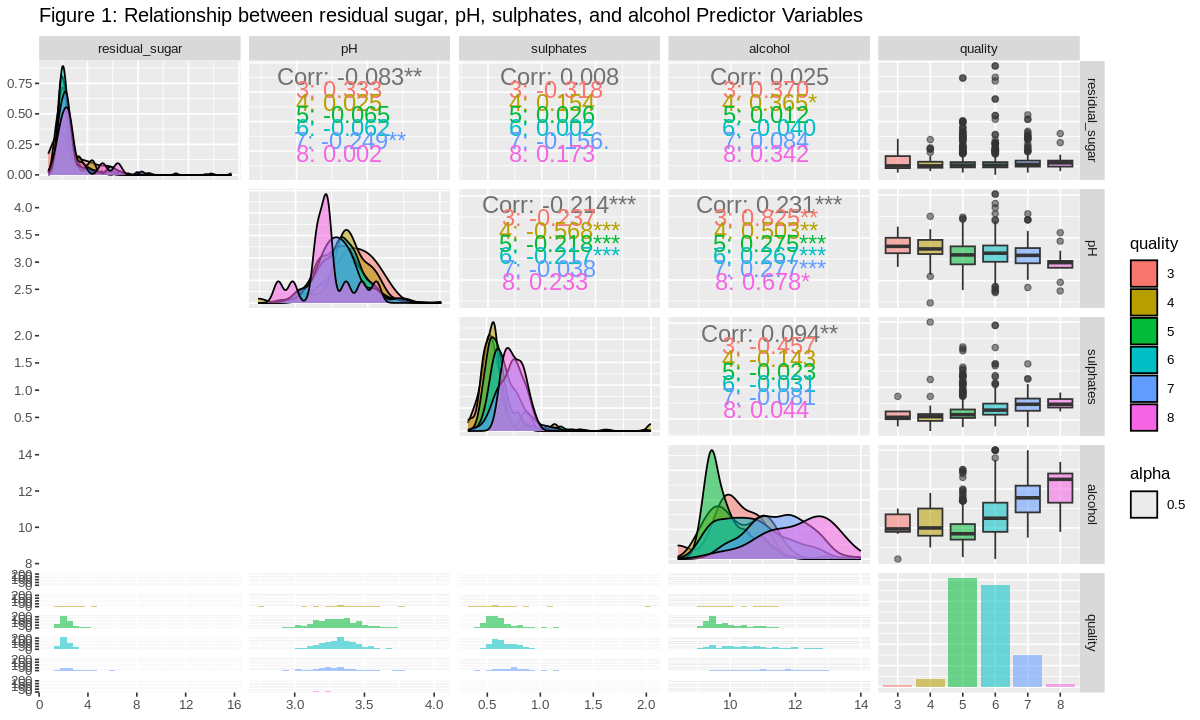

In [8]:
set.seed(3005)
options(repr.plot.width = 10, repr.plot.height = 6)
ggpairs(wine_train, 
        columns = c(1:5), 
        ggplot2::aes(color = quality, alpha = 0.5),
        legend = 1,
        upper = list(continuous = wrap("cor", size = 5)),
        lower = list(continuous = wrap('facethist', binwidth = 0.5)),
        labs(fill = "quality")) + 
    ggtitle("Figure 1: Relationship between residual sugar, pH, sulphates, and alcohol Predictor Variables") +
    theme(title = element_text(size = 10)) +
    theme_grey(base_size = 10)

### **2.0 Methods**

### 2.1 Preprocessing Data
Since the KNN algorithm is sensitive to scaling and such, preprocessing can eliminate major dominations and ensure 'equity' amongst the values. To preprocess the wine train dataset, we scale and center the data by creating a recipe with quality as the predictor. 

In [9]:
set.seed(2222)
wine_recipe <- recipe(quality ~ pH + alcohol + sulphates + residual_sugar, data = wine_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())
wine_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Then to create the algorithm, we choose a random number of neighbours to test the accuracy of the data. Using nearest_neighbor with a chosen weight function (rectangular in our case) and a chosen neighbours of 5 (any value can suffice, as long as it's not too large or obscure). Next, we create a model that includes the kknn engine and classification mode, it is then implemented into a workflow where the previously created recipe will be included along with the model. This will all be fitted onto the wine train dataset as a workflow and to an object named wine_fit.

Lastly, the prediction is done using the predict function using the workflow just created (wine_fit) with the wine train dataset we split earlier. The bind_cols function merges horizontal columns side by side which showcases all the variables and the predicted class along with its true value.

In [10]:
set.seed(2222)
wine_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 5) |>
set_engine('kknn') |>
set_mode('classification')


wine_fit <- workflow() |>
add_recipe(wine_recipe) |>
add_model(wine_spec)|>
fit(data = wine_train)

wine_predict <- predict(wine_fit, wine_test)  |>
bind_cols(wine_test)
print('Table 8: Class Prediction Accuracy of neighbors = 5')
head(wine_predict)

[1] "Table 8: Class Prediction Accuracy of neighbors = 5"


.pred_class,residual_sugar,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,1.9,3.51,0.56,9.4,5
5,1.6,3.30,0.46,9.4,5
6,3.8,3.16,0.88,9.2,5
5,4.4,3.38,0.50,9.0,4
5,1.8,3.04,1.08,9.2,6
5,1.6,3.17,0.91,9.5,5


### 2.2 Percentage Analytics
By collecting the metrics of the truth and estimate of the predictions made earlier with wine_fit and wine_train, we are able to produce a tibble that calculates the accuracy of the predicted class, it is pulled out and multiplied by 100 to get a (rounded) accuracy of 57.5% for 5 neighbours. Repeating the steps but changing the metrics function and filter for precision and recall, we can get their rounded percentages; 37% and 28.2% respectively. These percentages suggest that the chosen neighbours of 5 is not accurate enough to further polish up our algorithm, thus we should tune it

Furthermore, to analyse where the faulty predictions were made, running the prediction into a confusion matrix can introduce the true negatives, false negatives, false positives, and true positives. It also organises how many of each factor was classified as a value. This is a visual along with the percentages that can assist with our understanding of our chosen neighbours.

In [11]:
set.seed(2222)
wine_accuracy <- wine_predict |>
metrics(truth = quality, estimate = .pred_class) |>
filter(.metric == 'accuracy') |>
select(.estimate)|>
pull()
print('Accuracy of neighbors = 5')
wine_accuracy*100

[1] "Accuracy of neighbors = 5"


[1] 57.46269

In [12]:
set.seed(2222)
wine_accuracy <- wine_predict |>
precision(truth = quality, estimate = .pred_class, event_level = 'first') |>
filter(.metric == 'precision') |>
pull()
print('Precision of neighbors = 5')
wine_accuracy*100

Warning message:
“While computing multiclass `precision()`, some levels had no predicted events (i.e. `true_positive + false_positive = 0`). 
Precision is undefined in this case, and those levels will be removed from the averaged result.
Note that the following number of true events actually occured for each problematic event level:
'3': 1”


[1] "Precision of neighbors = 5"


[1] 36.97412

In [13]:
set.seed(2222)
wine_accuracy <- wine_predict |>
recall(truth = quality, estimate = .pred_class, event_level = 'first') |>
filter(.metric == 'recall') |>
pull()
print('Recall of neighbors = 5')
wine_accuracy*100

[1] "Recall of neighbors = 5"


[1] 28.16619

In [14]:
set.seed(2222)
wine_mat <- wine_predict |>
conf_mat(truth = quality, estimate = .pred_class)
print('Figure 2: Confusion Matrix of Prediction Class')
wine_mat

[1] "Figure 2: Confusion Matrix of Prediction Class"


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   1   3   1   0   0
         5   1   7 127  60   6   1
         6   0   5  39  86  26   1
         7   0   1   3  12  17   3
         8   0   0   1   1   0   0

### 2.3 Cross Validation
In order to improve the previous percentages of the classification algorithm, cross-validation (CV) allows us to tune the neighbours and analyse which neighbour provides the best outcomes for our classifier. The start of using CV is producing another split dataset from our wine_train specific for CV, the difference is that the 25% is for validation instead of testing data. CV allows to minimise the amount of unseen data while optimising the outcome of the model.

We have to create another recipe that uses the wine_subtrain data, then change the recipe in the workflow/fit although the specification model can be reused when tuning the neighbours later on.

After, we can run the predictions like earlier to find the accuracy in percentage by piping it into metrics and filtering for accuracy. Doing so we arrive at an accuracy of 54.7% rounded for the subtrain dataset.

In [15]:
set.seed(2222)
wine_cv_split <- initial_split(wine_train, prop = 0.75, strata = quality)
wine_subtrain <- training(wine_cv_split)
wine_validation <- testing(wine_cv_split)

wine_cv_recipe <- recipe(quality ~ pH + sulphates + alcohol + residual_sugar, data = wine_subtrain) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

wine_fit <- workflow() |>
add_recipe(wine_cv_recipe) |>
add_model(wine_spec) |>
fit(data = wine_subtrain)

wine_cv_prediction <- predict(wine_fit, wine_validation) |>
bind_cols(wine_validation)

wine_cv_accuracy <- wine_cv_prediction |>
metrics(truth = quality, estimate = .pred_class) |>
filter(.metric == 'accuracy') |>
pull()

print('Wine Subtrain Accuracy')
wine_cv_accuracy*100

[1] "Wine Subtrain Accuracy"


[1] 54.66667

Now we can actually perform the cross validation, considering we have 4 variables a 5 fold CV is too small to properly minimise unseen data, so a 10 fold CV will be used instead. This ultimately allows the model to train on 9 folds and be validated on the 10th fold, which is suggested for larger datasets for higher accuracy.

Again, we will have to build a new workflow/fit however this time it includes a fit_resamples function to include the cross-validation we created earlier, and this will replace the fit function.

Collecting the metrics shows the standard error for the cross validation's accuracy, and the lower this value is, the more consistent and reliable our model becomes. Here it is 0.01548 which is reasonably low.

In [16]:
set.seed(2222)
wine_vfold <- vfold_cv(wine_train, v = 10, strata = quality)

wine_re_fit <- workflow() |>
add_recipe(wine_recipe) |>
add_model(wine_spec) |>
fit_resamples(resamples = wine_vfold)

→ A | warning: No observations were detected in `truth` for level(s): '8'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: No observations were detected in `truth` for level(s): '3'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
→ C | warning: No observations were detected in `truth` for level(s): '3', '8'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x2   B: x1   C: x1





In [17]:
set.seed(2222)
wine_metrics <- collect_metrics(wine_re_fit)
print('Table 9: 10 Fold Cross Validation Accuracy')
wine_metrics

[1] "Table 9: 10 Fold Cross Validation Accuracy"


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.5521151,10,0.01478471,Preprocessor1_Model1
roc_auc,hand_till,0.6628266,10,0.01566314,Preprocessor1_Model1


### **3.0 Tuning the K to Optimize Performance**

After the cross validation, we turn to tuning our original model by changing the K neighbours from 5 to tune(), this allows us to focus on optimal parameters and evaluate our model's performance. In addition, it suggests the final K value that would make our machine learning algorithm more effective. 


There are various ways to approach the fitting of the model, in our case we skipped the step of creating a tibble with a large range of values as our dataset is large which the addition of more K neighbours wouldn't necessarily aid with a greater accuracy, thus a smaller range will suffice, so we chose 1-20.


It is time to create another workflow, we piped it into a tune grid that resampled the cross validation along with our tibble. Lastly the metrics are collected and filtered for accuracy, the mean and standard error, which neighbours of 1 and 2 have the greatest mean and small standard error, although 1 is the smaller of the two by the slightest differences.


In [18]:
set.seed(2222)
wine_tune <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
set_engine('kknn') |>
set_mode('classification')

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

wine_results <- workflow() |>
add_recipe(wine_recipe) |>
add_model(wine_tune)|>
tune_grid(resamples = wine_vfold, grid = k_vals) |>
collect_metrics() |>
filter(.metric == 'accuracy')
print('Table 10: Tuned 10 Fold Cross Validation Accuracy')
wine_results

→ A | warning: No observations were detected in `truth` for level(s): '8'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

→ B | warning: No observations were detected in `truth` for level(s): '3'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x2
There were issues with some computations   A: x2   B: x1

→ C | warning: No observations were detected in `truth` for level(s): '3', '8'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x2   B: x1
There were issues with some computations   A: x2   B: x1   C: x1

There were issues with some computations   A: x2   B: x1   C: x1





[1] "Table 10: Tuned 10 Fold Cross Validation Accuracy"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6006174,10,0.011819468,Preprocessor1_Model01
2,accuracy,multiclass,0.5997841,10,0.011590331,Preprocessor1_Model02
3,accuracy,multiclass,0.5496852,10,0.013359219,Preprocessor1_Model03
4,accuracy,multiclass,0.5337885,10,0.013361110,Preprocessor1_Model04
5,accuracy,multiclass,0.5521151,10,0.014784709,Preprocessor1_Model05
6,accuracy,multiclass,0.5504273,10,0.015838429,Preprocessor1_Model06
7,accuracy,multiclass,0.5580329,10,0.013142627,Preprocessor1_Model07
8,accuracy,multiclass,0.5563591,10,0.011792327,Preprocessor1_Model08
9,accuracy,multiclass,0.5638520,10,0.009146043,Preprocessor1_Model09


The plot below is a visualisation of the best K neighbour values, we plotted both a scatterplot and line graph to see it’s trends. As mentioned before 1 and 2 are the best for accuracy, it's seen that the values afterwards are slowly depleting.

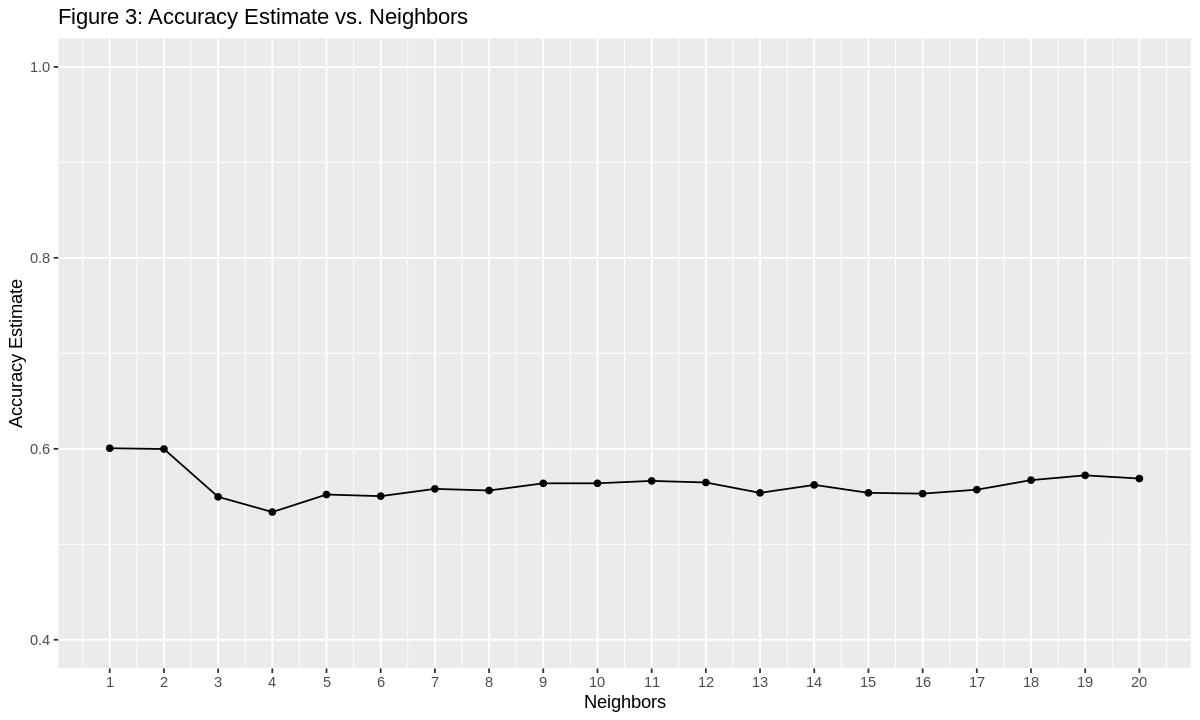

In [19]:
set.seed(3005)
accuracy_versus_k <- ggplot(wine_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 20, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
      ggtitle('Figure 3: Accuracy Estimate vs. Neighbors')
accuracy_versus_k

To finalize our analysis, arranging in descending order allows us to have the optimal K value, which is pulled as it will be used later.

In [20]:
set.seed(2222)
optimal_k <- wine_results |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
print("Optimal K Value")
optimal_k

[1] "Optimal K Value"


[1] 1

### 3.1 Final Training
The model will be trained with the optimal K value with the initial steps done in 2.1 where we created a recipe, model and fit, and we will summarize our findings similarly done earlier in 2.2. Technically though, only the model and fit will be affected as we're changing the K value from 5 to 1, so the recipe can be reused.

In [21]:
set.seed(2222)
wine_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = optimal_k) |>
set_engine('kknn') |>
set_mode('classification')

wine_fit <- workflow() |>
add_recipe(wine_recipe) |>
add_model(wine_spec) |>
fit(data = wine_train)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3842941
Best kernel: rectangular
Best k: 1

### 3.2 Final Percentage Analytics
Our final steps now is to test our new knn classification algorithm on our wine testing dataset, then summarize the data's accuracy, precision and recall to compare to the original run of the data for K neighbors of 5.

In [22]:
set.seed(2222)

wine_final_predict <- predict(wine_fit, wine_test) |>
bind_cols(wine_test)

wine_accuracy <- wine_final_predict |>
metrics(truth = quality, estimate = .pred_class) |>
filter(.metric == 'accuracy') |>
pull()
print('Accuracy of neighbors = 2')
wine_accuracy*100

[1] "Accuracy of neighbors = 2"


[1] 62.68657

In [23]:
set.seed(2222)
wine_accuracy <- wine_final_predict |>
precision(truth = quality, estimate = .pred_class, event_level = 'first') |>
filter(.metric == 'precision') |>
pull()
print('Precision of neighbors = 2')
wine_accuracy*100

Warning message:
“While computing multiclass `precision()`, some levels had no predicted events (i.e. `true_positive + false_positive = 0`). 
Precision is undefined in this case, and those levels will be removed from the averaged result.
Note that the following number of true events actually occured for each problematic event level:
'8': 5”


[1] "Precision of neighbors = 2"


[1] 41.27148

In [24]:
set.seed(2222)
wine_accuracy <- wine_final_predict |>
recall(truth = quality, estimate = .pred_class, event_level = 'first') |>
filter(.metric == 'recall') |>
pull()
print('Recall of neighbors = 2')
wine_accuracy*100

[1] "Recall of neighbors = 2"


[1] 33.72181

Comparatively, the final percentages with the optimal K were accuracy = 62.7%, precision = 41.3% and recall = 33.7%, computing differences of accuracy = 5.2%, precision = 4.3% and recall = 5.5%. An overall improvement in percentages by an average of 5% increase.

### **4.0 Visualization of Optimal K**
To finish the project, a confusion matrix will aid in producing a heatmap to visualise the accuracy in predictions. The colours correlate to its precision, where the spectrum begins lighter for high accuracy, gradually getting darker for low accuracy. We downloaded caret and tibble as library packages to aid in converting a confusion matrix into a tibble, then using that tibble in a ggplot2 and caret extension to plot a heatmap.

Also note, the earlier warnings about values 3 and 8 were referring to how there were not true values as seen below in the confusion matrix.

In [25]:
library(caret)
library(tibble)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:kknn’:

    contr.dummy


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [26]:
set.seed(2222)
print('Figure 4: Confusion Matrix with Optimal K Predictions')
optimal_conf_mat <- conf_mat(wine_final_predict, truth = quality, estimate = .pred_class)
optimal_conf_mat

[1] "Figure 4: Confusion Matrix with Optimal K Predictions"


          Truth
Prediction   3   4   5   6   7   8
         3   0   1   1   1   0   0
         4   0   3   5   4   0   0
         5   1   4 125  35  10   1
         6   0   5  41 102  17   1
         7   0   1   1  18  22   3
         8   0   0   0   0   0   0

In [27]:
set.seed(2222)
optimal_k_matrix <- optimal_conf_mat$table

optimal_k_data <- as_tibble(optimal_k_matrix)
print('Table 11: Confusion Matrix as a Dataframe')
optimal_k_data

[1] "Table 11: Confusion Matrix as a Dataframe"


Prediction,Truth,n
<chr>,<chr>,<dbl>
3,3,0
4,3,0
5,3,1
6,3,0
7,3,0
8,3,0
3,4,1
4,4,3
5,4,4


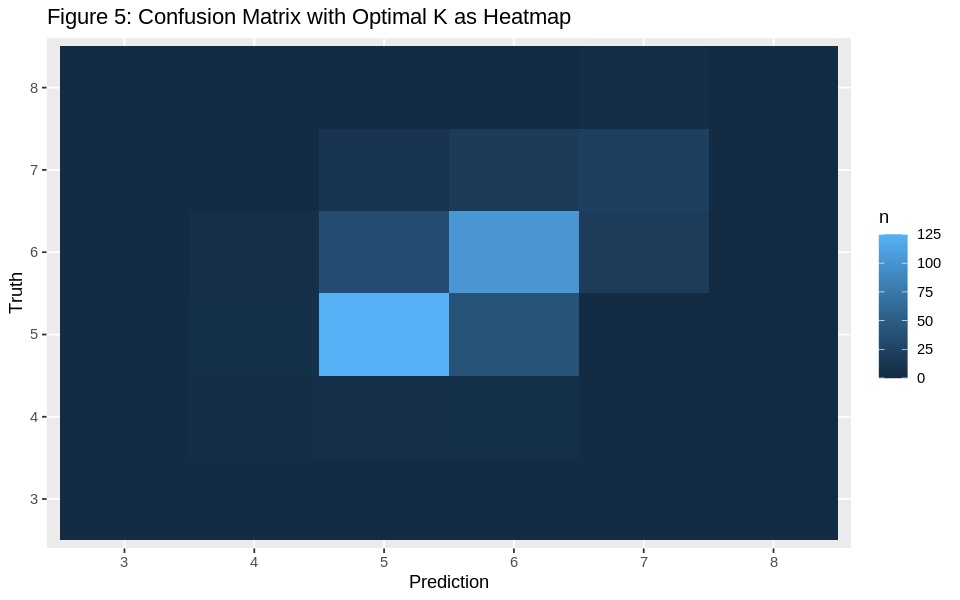

In [28]:
set.seed(3005)
#reference https://stackoverflow.com/questions/7421503/how-to-plot-a-confusion-matrix-using-heatmaps-in-r
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(optimal_k_data, aes(x = Prediction, y = Truth, fill = n)) + 
geom_tile() + 
ggtitle("Figure 5: Confusion Matrix with Optimal K as Heatmap")

Our KNN classification algorithm is extremely accurate when it comes to quality 5 and 6, but the other values 3, 4, 7, and 8 show little to no prediction accuracy. The heatmap is dark other than the middle (coincidentally the median) where it gradually gets darker as it expands outwards, showing the inconsistencies needed to be workshopped to produce a more inclusive and precise algorithm.

### **5.0 Discussion**

Based on the preliminary data exploration we can already see which variables show high correlation with wine quality. Interestingly the box plot shows that there is very little correlation between residual sugars and quality. This is notable as residual sugars are considered the main contributor to a wine’s sweetness, sweetness being a major aspect sommeliers consider when determining a wine’s quality (Cheynier & Sarni-Manchado, 2014). The box plots for pH in relation to quality show a negative correlation between pH and quality, where as the quality rating increases, the pH decreases. It does appear that quality 8 wines have a smaller pH value spread than the others but as a whole the wine samples usually have a pH somewhere between 3.5 and 3. Increasing alcohol content shows a correlation with increasing quality from ratings 5 to 8 and a correlation with decreasing quality from ratings 3-5. If this inconsistent correlation negatively impacts the effectiveness of the classification algorithm it may mean quantitative alcohol content is not an ideal predictor. Sulphates show a minor positive correlation with quality, where higher quality wines have higher sulphate content. 

We expect to find that our variables exhibit a strong correlation with red wine quality in our dataset, with a fair amount in the mid-range of quality (~5).Through visualizations, we expect to observe clear patterns and trends between the selected attributes with wine quality. High-quality wines seem to have lower volatile acidity, higher alcohol, and medium-high sulphate values. Meanwhile, lower-quality wines tend to have low values for citric acid (Nguyen, 2020). We anticipate achieving a satisfactory level of accuracy in our classification model, indicating the effectiveness of our variables as predictors of red wine quality.
 
The findings from our analysis could have significant implications for the wine industry, particularly in quality assurance and control during wine production. Consumers often rely on quality indicators when selecting wines. Our findings could provide valuable guidance to consumers by highlighting the key attributes associated with high-quality red wines (Basalekou, et al., 2023). This could lead to more informed purchasing decisions and improved overall satisfaction among wine enthusiasts.

#### 5.1 Future questions

What effect do additional variables like acidity, tannin content, or grape varietal have on the estimation of wine quality?

Do identified predictors hold consistent predictive power across diverse wine types.?

How can we track the evolution of wine quality over time, including the aging process, and how this affects the relationship between key attributes and wine quality? .

### **References (APA format)**

Watrelot, A. A., Heymann, H., & Waterhouse, A. L. (2019). Red wine dryness perception related to physicochemistry. Journal of Agricultural and Food Chemistry, 68(10), 2964–2972. https://doi.org/10.1021/acs.jafc.9b01480  

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

Basalekou, M., Tataridis, P., Georgakis, K., & Tsintonis, C. (2023). Measuring Wine Quality and Typicity. Beverages, 9, 41. https://doi.org/10.3390/beverages9020041